# 🏞 Convolutional Neural Network

In this notebook, we'll walk through the steps required to train your own convolutional neural network (CNN) on the CIFAR dataset

In [ ]:
import matplotlib.pyplot as plt


def sample_batch(dataset):
    batch = dataset.take(1).get_single_element()
    if isinstance(batch, tuple):
        batch = batch[0]
    return batch.numpy()


def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display
import tensorflow.keras as keras

## 0. Parameters <a name="parameters"></a>

In [ ]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

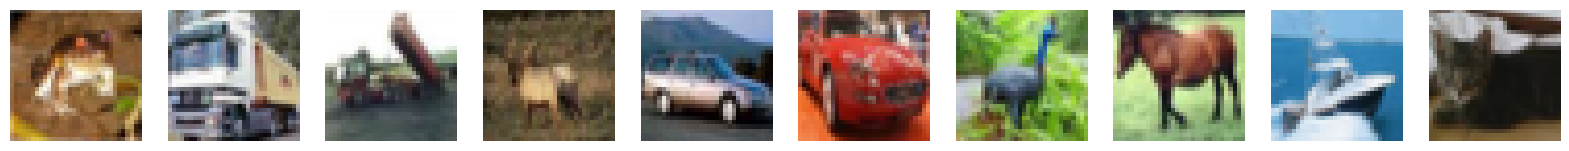

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [ ]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.3)(x)

x = layers.Conv2D(filters=64,  kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Flatten()(x)

x = layers.Dense(32, kernel_regularizer='l2')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
#x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES, kernel_regularizer='l2')(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                            

## 3. Train the model <a name="train"></a>

In [ ]:
opt = optimizers.Adam()
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=40,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/40
391/391 [==============================] - 16s 18ms/step - loss: 2.1298 - accuracy: 0.3733 - val_loss: 2.2340 - val_accuracy: 0.2315
Epoch 2/40
391/391 [==============================] - 6s 14ms/step - loss: 1.5873 - accuracy: 0.4800 - val_loss: 1.6194 - val_accuracy: 0.4610
Epoch 3/40
391/391 [==============================] - 6s 15ms/step - loss: 1.4732 - accuracy: 0.5094 - val_loss: 1.7032 - val_accuracy: 0.4253
Epoch 4/40
391/391 [==============================] - 6s 15ms/step - loss: 1.4109 - accuracy: 0.5295 - val_loss: 1.6607 - val_accuracy: 0.4594
Epoch 5/40
391/391 [==============================] - 6s 15ms/step - loss: 1.3593 - accuracy: 0.5452 - val_loss: 1.4012 - val_accuracy: 0.5499
Epoch 6/40
391/391 [==============================] - 6s 15ms/step - loss: 1.3050 - accuracy: 0.5664 - val_loss: 1.2897 - val_accuracy: 0.5675
Epoch 7/40
391/391 [==============================] - 6s 15ms/step - loss: 1.2634 - accuracy: 0.5818 - val_loss: 1.4270 - val_accuracy: 0.547

## 4. Evaluation <a name="evaluate"></a>

In [ ]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 36ms/step - loss: 0.7824 - accuracy: 0.7408


[0.782421350479126, 0.7408000230789185]

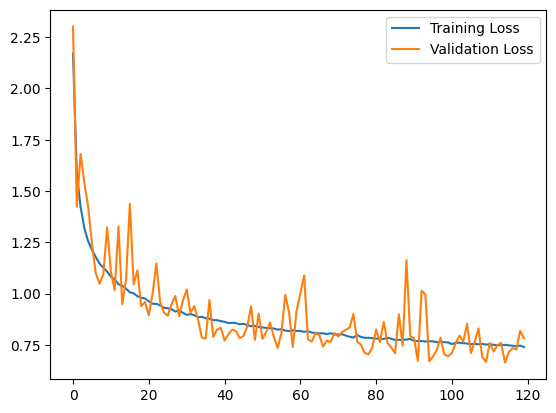

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

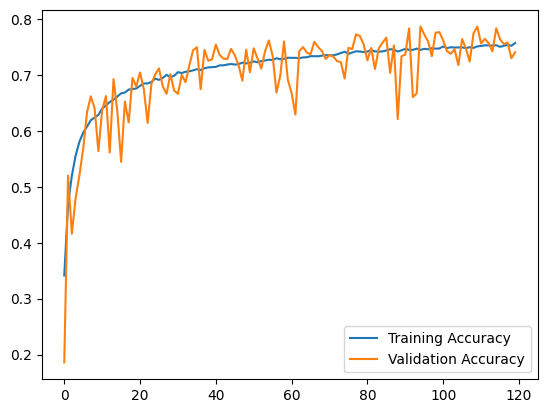

In [ ]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


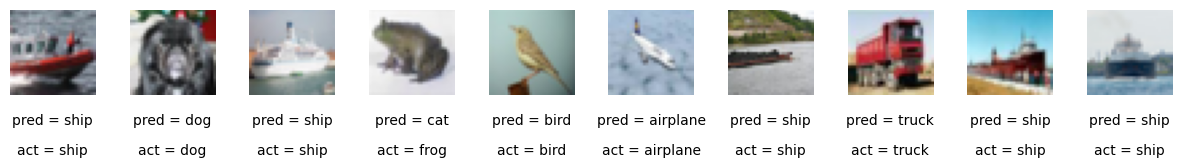

In [ ]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)